# Ordered Discrete Choice Modeling

This lesson draws heavily from the UCLA statistical consulting page on the topic: 

https://stats.idre.ucla.edu/r/dae/ordinal-logistic-regression/

and from the statsmodels documentation:

https://www.statsmodels.org/devel/examples/notebooks/generated/ordinal_regression.html


### Motivation

We talked about choice models last time.  Sometimes the choices have an order, and that ordering provides extra information that we can take advantage of.  By enforcing that ordering, we can estimate fewer coefficients, which is somtimes a good thing.

### Libraries

Will be using [Statsmodels](http://statsmodels.sourceforge.net/), but we require the latest development version.  See: 
    
https://www.statsmodels.org/devel/install.html    

and follow the instructions.  

### Today's objective

Today, we want to predict whether a student is unlikely, somewhat likely  or very likely to apply to graduate school.  There are clearly ordered.  Let's start by looking at the examples on the UCLA page:

https://stats.idre.ucla.edu/r/dae/ordinal-logistic-regression/


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.miscmodels.ordinal_model import OrderedModel

# this allows plots to appear directly in the notebook
%matplotlib inline

ModuleNotFoundError: No module named 'statsmodels.miscmodels.ordinal_model'

In [3]:
# get the data
url = "https://stats.idre.ucla.edu/stat/data/ologit.dta"
df = pd.read_stata(url)
df.head()

,apply,pared,public,gpa
0,very likely,0,0,3.26
1,somewhat likely,1,0,3.21
2,unlikely,1,1,3.94
3,somewhat likely,0,0,2.81
4,somewhat likely,0,0,2.53


In [4]:
df.dtypes

apply     category
pared         int8
public        int8
gpa        float32
dtype: object

### Look at the data

It is often a good idea to look at the data we want to model, and see how it relates to some variables we expect to be important.  We can do this using seaborn, which we learned about a few weeks ago.  

In [5]:
df['apply'].value_counts()

unlikely           220
somewhat likely    140
very likely         40
Name: apply, dtype: int64

In [6]:
df['pared'].value_counts()

0    337
1     63
Name: pared, dtype: int64

In [7]:
df['public'].value_counts()

0    343
1     57
Name: public, dtype: int64

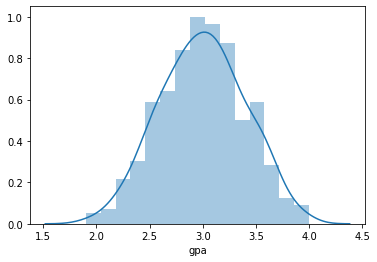

In [8]:
sns.distplot(df['gpa'])

### Estimating a model

OK, that's fine, we can do plots, but we want some actual numbers.  For this, we want to estimate what the model coefficients are. 

In [9]:
mod = OrderedModel.from_formula("apply ~ 0 + pared + public + gpa", df,
                                      distr='logit')
res = modf_logit.fit(method='bfgs')
res.summary()

NameError: name 'OrderedModel' is not defined

### Homework

1. Install the development version (0.13.0.dev0) of statsmodels. 
2. Estimate the model specified above. Then answer: Is someone with a GPA of 4.0, who went to public school and whose parents do not have a graduate degree have more or less likely to apply to graduate school than someone with a GPA of 3.0 whose parents have a graduate degree and who went to private school.
3. Estimate a multinomial logit model of the same choice.  Explain how the two are different. 
4. Estimate an ordered logit model of vehicle ownership (from last time).  Explain which model you prefer and why.  